In [19]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [20]:
max_features = 10000
maxlen = 500
batch_size = 32

In [21]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [22]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [23]:
model = Sequential()

model.add(Embedding(max_features, 32))

model.add(LSTM(32))

model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 37s 263ms/step - loss: 0.5338 - accuracy: 0.7309 - val_loss: 0.3409 - val_accuracy: 0.8643
Epoch 2/5
137/137 [==============================] - 35s 256ms/step - loss: 0.2694 - accuracy: 0.8961 - val_loss: 0.2975 - val_accuracy: 0.8816
Epoch 3/5
137/137 [==============================] - 36s 261ms/step - loss: 0.1820 - accuracy: 0.9367 - val_loss: 0.3000 - val_accuracy: 0.8757
Epoch 4/5
137/137 [==============================] - 36s 263ms/step - loss: 0.1495 - accuracy: 0.9495 - val_loss: 0.3326 - val_accuracy: 0.8821
Epoch 5/5
137/137 [==============================] - 34s 252ms/step - loss: 0.1091 - accuracy: 0.9655 - val_loss: 0.3661 - val_accuracy: 0.8729


In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


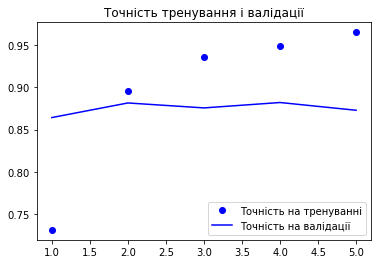

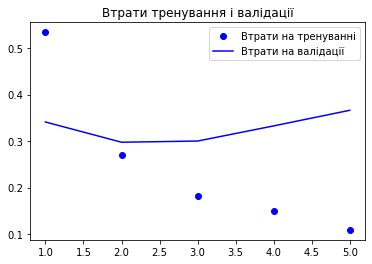

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, accuracy, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_accuracy, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [30]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

782/782 [==============================] - 37s 47ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 39s 49ms/step - loss: 0.4008 - accuracy: 0.8611
Test Accuracy: 86.11%


Висновок: Час виконання 5-ти епох - 2 хв. 58 сек. Точність склала 86.1%